In [1]:
%cd ..

/Users/datvodinh/Documents/Github/data-science-project


### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

### Set plot Style

In [3]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('font', size=10)

# 1. Data Overview

In [4]:
data = pd.read_csv("./data/tgdd.csv")

### 1.1 Show Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        249 non-null    object 
 1   CPU Name            249 non-null    object 
 2   CPU manufacturer    249 non-null    object 
 3   CPU brand modifier  245 non-null    float64
 4   CPU generation      242 non-null    float64
 5   CPU Speed (GHz)     247 non-null    float64
 6   RAM (GB)            249 non-null    int64  
 7   RAM Type            249 non-null    object 
 8   Bus (MHz)           249 non-null    int64  
 9   Storage (GB)        249 non-null    int64  
 10  Screen Size (inch)  249 non-null    float64
 11  Screen Resolution   249 non-null    object 
 12  Refresh Rate (Hz)   249 non-null    int64  
 13  Weight (kg)         249 non-null    float64
 14  Battery             249 non-null    float64
 15  Price (VND)         244 non-null    float64
dtypes: float

In [6]:
data.head(3)

,Manufacturer,CPU Name,CPU manufacturer,CPU brand modifier,CPU generation,CPU Speed (GHz),RAM (GB),RAM Type,Bus (MHz),Storage (GB),Screen Size (inch),Screen Resolution,Refresh Rate (Hz),Weight (kg),Battery,Price (VND)
0,hp,Intel Core i3 Alder Lake - 1215U,Intel,3.0,12.0,1.2,8,DDR4,3200,256,14.0,1920x1080,60,1.41,41.0,12990000.0
1,hp,Intel Core i3 Alder Lake - 1215U,Intel,3.0,12.0,1.2,8,DDR4,3200,512,15.6,1920x1080,60,1.69,41.0,13690000.0
2,hp,Intel Core i5 Alder Lake - 1235U,Intel,5.0,12.0,1.3,8,DDR4,3200,512,15.6,1920x1080,60,1.70,41.0,18890000.0


### 1.2 Remove Duplicate

# 2. Exploratory Data Analysis (EDA)

In [7]:
features_data = data.drop('Price (VND)',axis=1)
price_data = data['Price (VND)']

### 2.1 Check Null Variable

<Axes: >

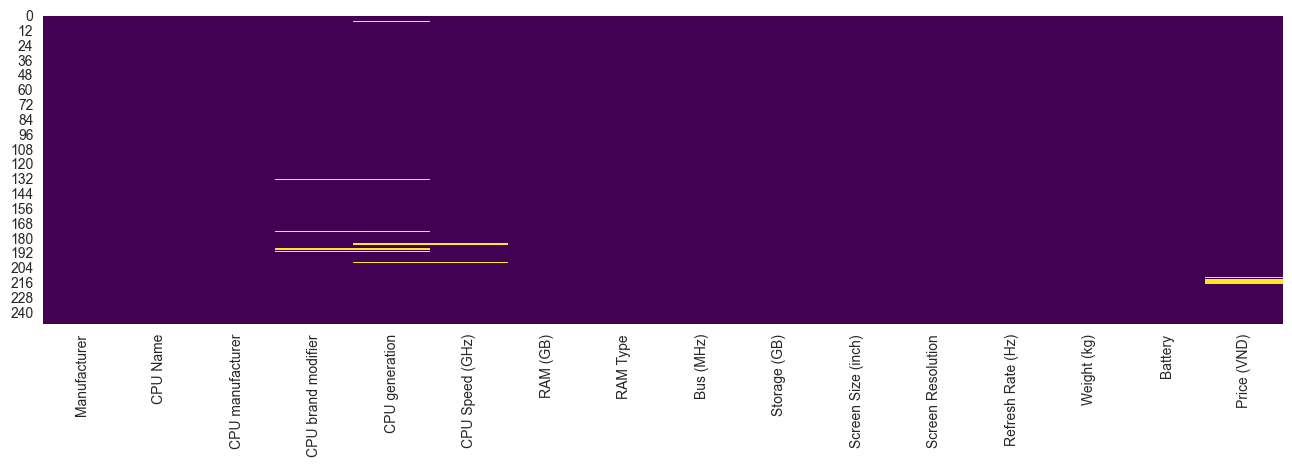

In [8]:
plt.figure(figsize=(16, 4))
sns.heatmap(data.isnull(), cmap='viridis',cbar= False, fmt='.0f')

### 2.2 Numerical features

In [9]:
numerical_features=[col for col in features_data.columns if features_data[col].dtype!='O']
numerical_features

['CPU brand modifier',
 'CPU generation',
 'CPU Speed (GHz)',
 'RAM (GB)',
 'Bus (MHz)',
 'Storage (GB)',
 'Screen Size (inch)',
 'Refresh Rate (Hz)',
 'Weight (kg)',
 'Battery']

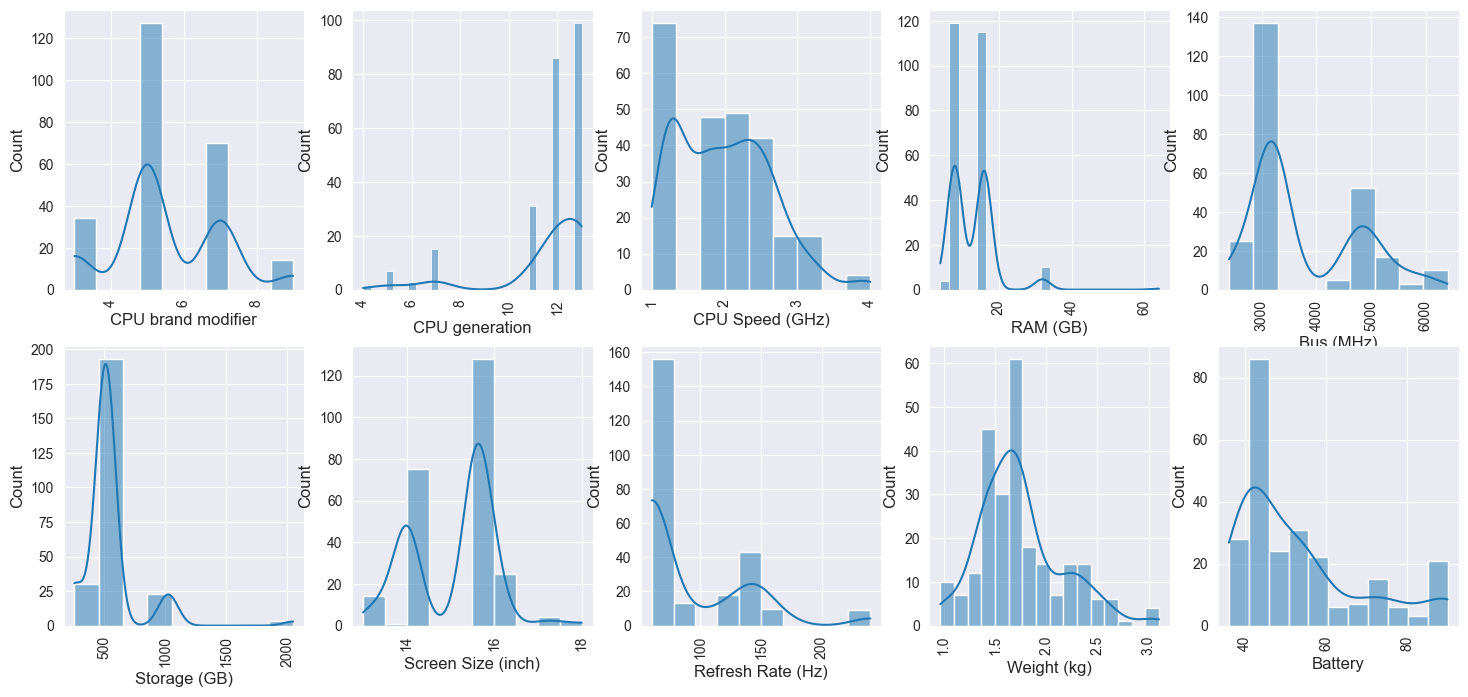

In [10]:
fig, ax = plt.subplots(2,5, figsize=(18,8))
for i in range(len(numerical_features)):
    row,cols = divmod(i, 5)
    sns.histplot(features_data[numerical_features[i]], kde=True, ax=ax[row, cols])
    # rotate x title by 90 degree
    ax[row, cols].xaxis.set_tick_params(rotation=90)
plt.show()

#### Correlation Matrix

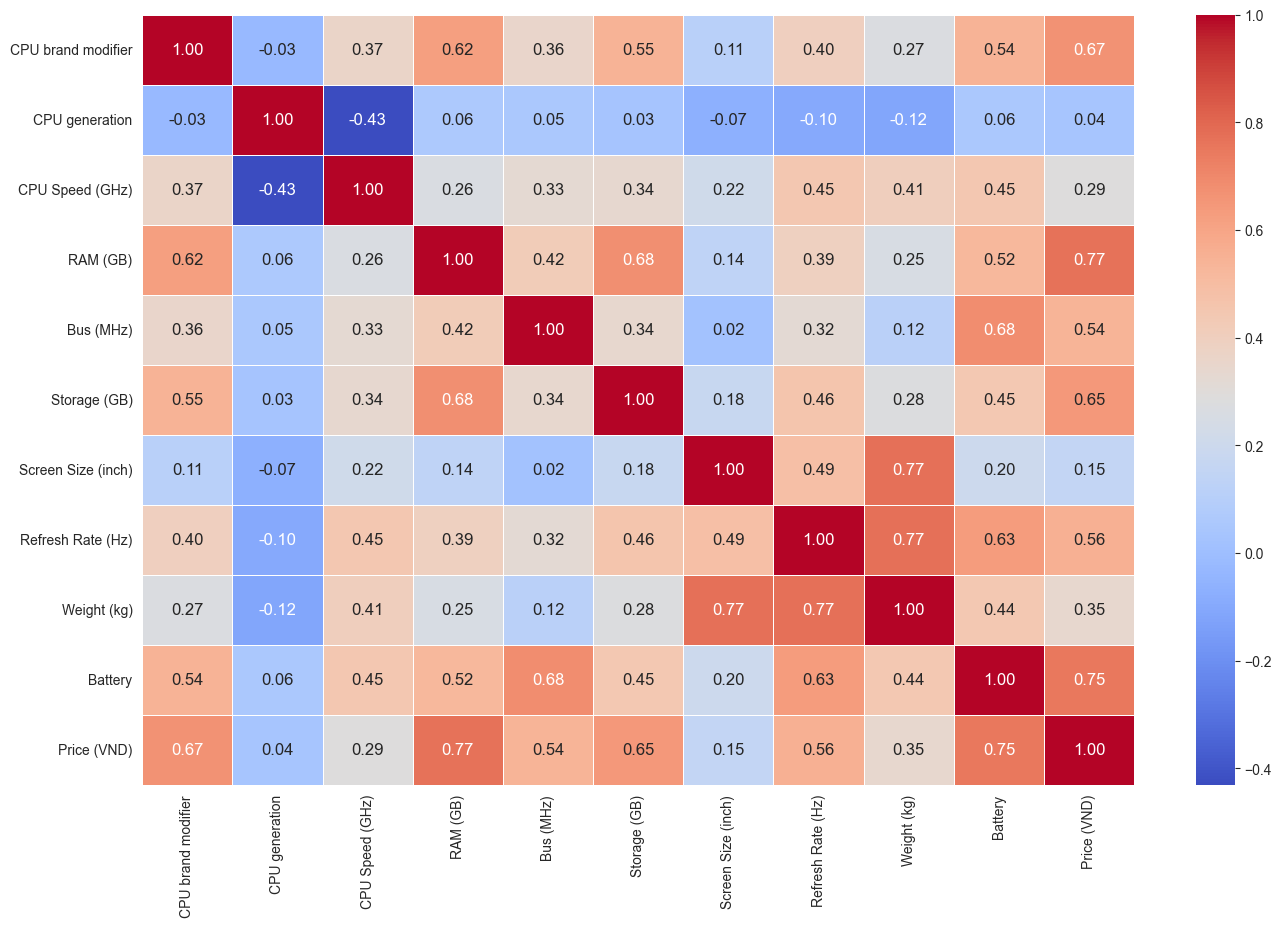

In [11]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, annot_kws={"size": 12})
plt.show()

### 2.3 Categorical Features

In [12]:
categorical_features=[col for col in features_data.columns if features_data[col].dtype=='O']
categorical_features.remove('CPU Name')
categorical_features

['Manufacturer', 'CPU manufacturer', 'RAM Type', 'Screen Resolution']

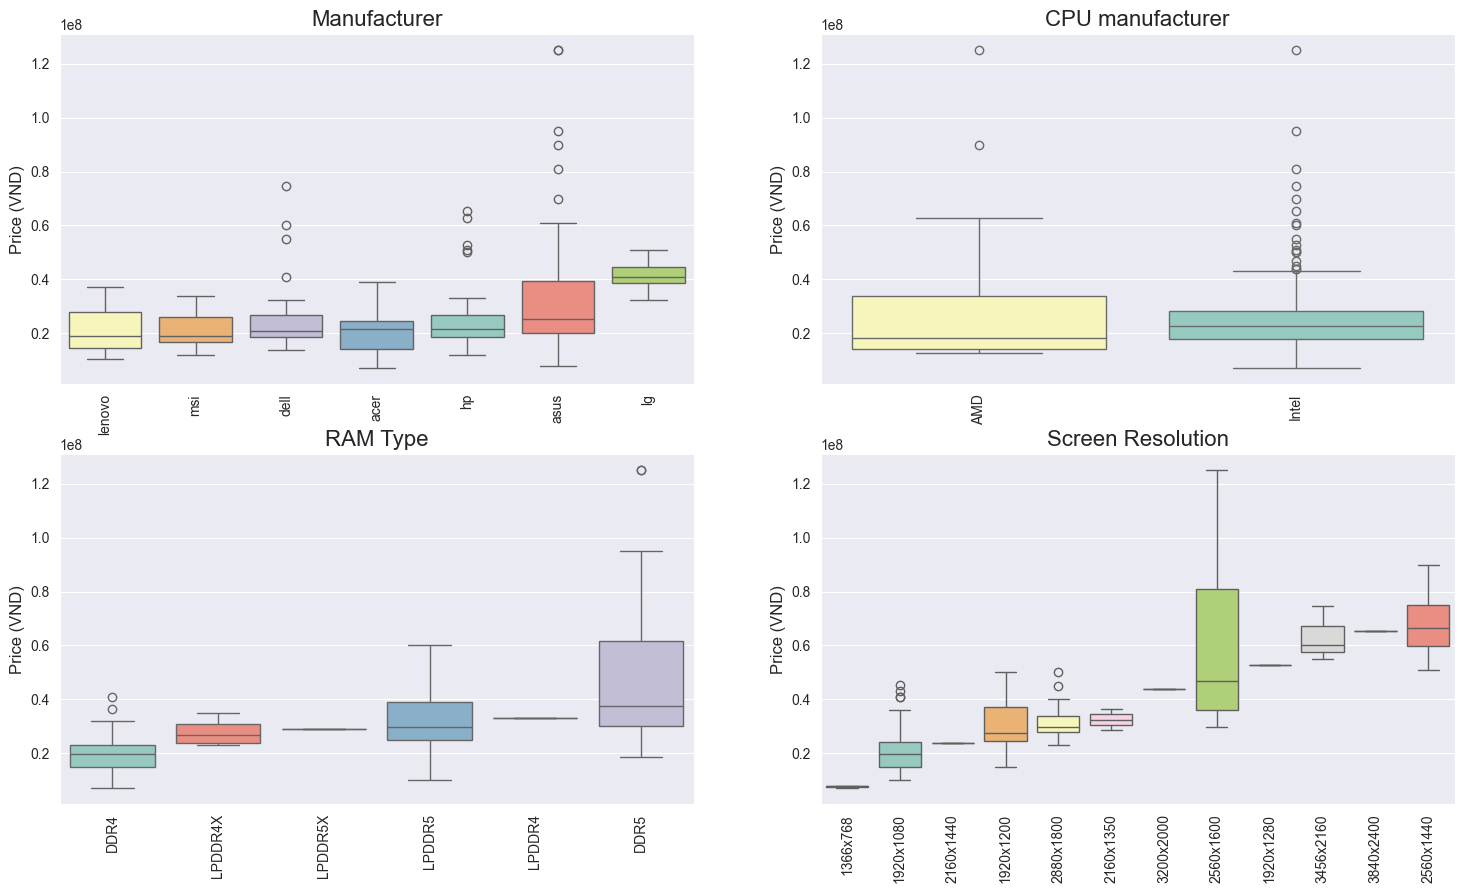

In [13]:
plt.figure(figsize=(18,10))
for i in range(len(categorical_features)):
    plt.subplot(2,2,i+1)
    plt.title(categorical_features[i])
    sns.boxplot(data=data, x=categorical_features[i], y="Price (VND)", palette="Set3", hue=categorical_features[i],legend=False,
                order=data['Price (VND)'].groupby(data[categorical_features[i]]).median().sort_values().index
                )
    plt.xticks(rotation=90)
    plt.xlabel('')

In [40]:
data["Weight (kg)"].unique()

array([1.41 , 1.69 , 1.7  , 1.47 , 1.72 , 2.29 , 1.36 , 1.53 , 1.34 ,
       2.4  , 2.31 , 1.74 , 1.39 , 1.28 , 1.22 , 2.34 , 2.32 , 2.35 ,
       0.99 , 1.35 , 1.79 , 1.51 , 1.517, 1.68 , 1.63 , 1.58 , 1.43 ,
       1.17 , 1.61 , 1.85 , 2.25 , 1.65 , 1.62 , 1.44 , 1.49 , 1.42 ,
       1.168, 0.966, 1.64 , 1.4  , 1.67 , 1.9  , 1.83 , 1.97 , 1.66 ,
       1.87 , 1.92 , 1.26 , 2.81 , 1.531, 1.78 , 1.46 , 1.55 , 2.2  ,
       2.3  , 1.8  , 1.88 , 1.5  , 2.6  , 2.1  , 3.   , 2.5  , 3.1  ,
       2.67 , 1.   , 2.   , 1.2  , 1.6  , 1.45 , 1.19 , 1.75 , 1.86 ,
       1.98 , 1.999, 1.25 , 0.999])

### 2.4 Price Histogram

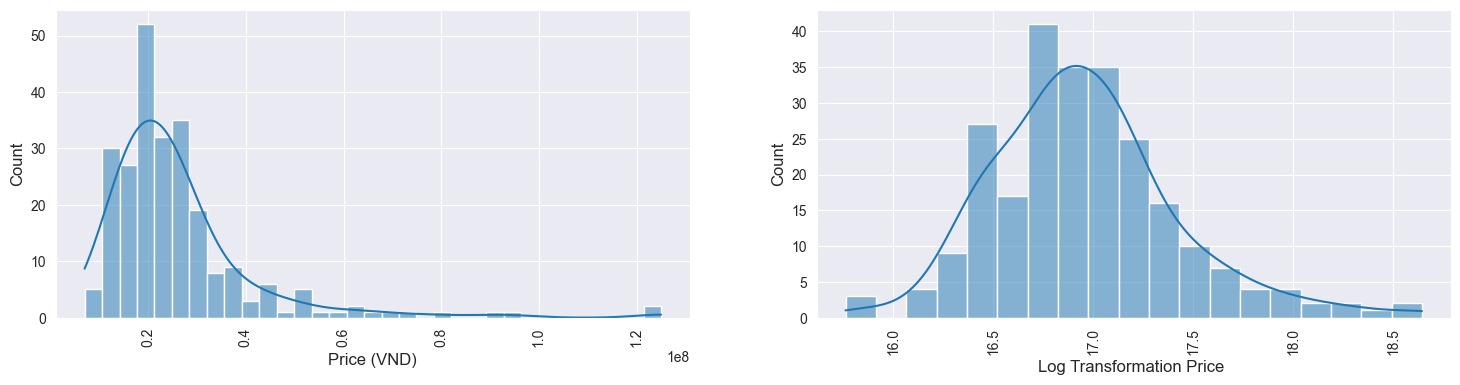

In [14]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.histplot(data['Price (VND)'], kde=True)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.histplot(np.log(data['Price (VND)']), kde=True)
plt.xlabel('Log Transformation Price ')
plt.xticks(rotation=90)
plt.show()

# 3. Data PreProcessing

In [15]:
process_data = data.copy()

### 3.1 Data Imputation

#### 3.1.1 Drop all row where price is Nan

<Axes: >

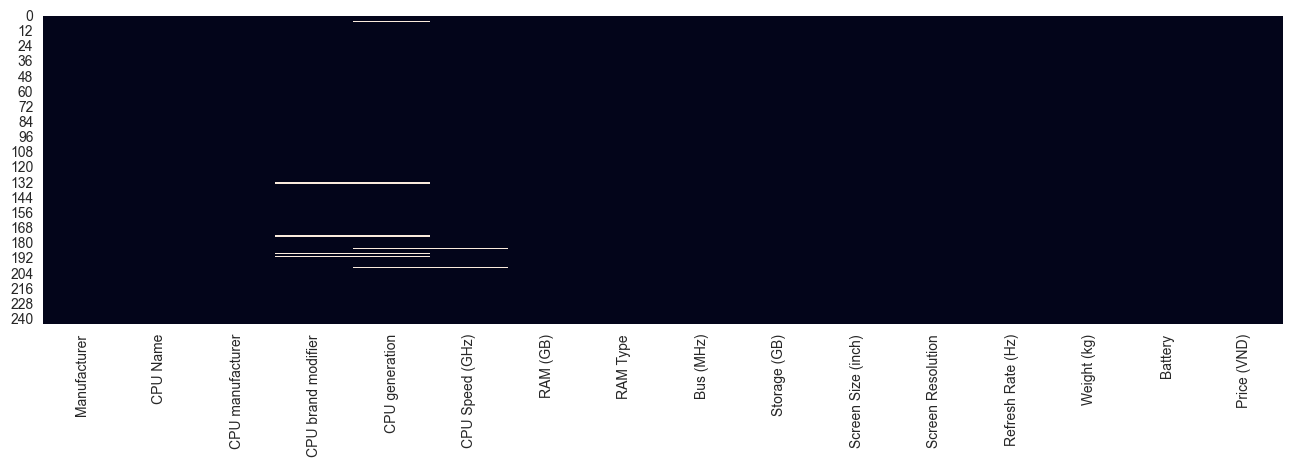

In [16]:
process_data = data.dropna(subset=['Price (VND)'], axis=0, inplace=False)
# reset index
process_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(16, 4))
sns.heatmap(process_data.isnull(), cbar=False)

#### 3.1.2 Merge CPU manufacter and CPU generation and fill nan for all CPU's stat

In [17]:
process_data['CPU generation'].value_counts()

CPU generation
13.0    95
12.0    86
11.0    30
7.0     15
5.0      7
6.0      3
4.0      1
Name: count, dtype: int64

In [18]:
# calulate median of CPU's stat group by CPU manufacturer (AMD or Intel)
median_brand_modifier = process_data['CPU brand modifier'].groupby(process_data['CPU manufacturer']).median()
median_generation = process_data['CPU generation'].groupby(process_data['CPU manufacturer']).median()
median_speed = process_data['CPU Speed (GHz)'].groupby(process_data['CPU manufacturer']).median()

In [19]:
median_generation

CPU manufacturer
AMD       7.0
Intel    12.0
Name: CPU generation, dtype: float64

In [20]:
process_data['CPU manufacturer'].map(median_generation).value_counts()

CPU manufacturer
12.0    218
7.0      26
Name: count, dtype: int64

In [21]:
# fill nan value of CPU's stat by median of CPU's stat group by CPU manufacturer
process_data['CPU brand modifier'].fillna(data['CPU manufacturer'].map(median_brand_modifier), inplace=True)
process_data['CPU generation'].fillna(data['CPU manufacturer'].map(median_generation), inplace=True)
process_data['CPU Speed (GHz)'].fillna(data['CPU manufacturer'].map(median_speed), inplace=True)

In [22]:
process_data['CPU'] = process_data['CPU manufacturer'] + ' Gen ' + process_data['CPU generation'].astype(str) + "th"

In [23]:
process_data['CPU'].value_counts()

CPU
Intel Gen 13.0th    95
Intel Gen 12.0th    93
Intel Gen 11.0th    30
AMD Gen 7.0th       15
AMD Gen 5.0th        7
AMD Gen 6.0th        3
AMD Gen 4.0th        1
Name: count, dtype: int64

In [24]:
process_data.drop(columns=['CPU manufacturer', 'CPU generation'], axis=1, inplace=True)
process_data.drop(columns=['CPU Name'], axis=1, inplace=True)

In [25]:
len(process_data.columns)

14

### 3.2 One Hot Encoding

In [26]:
categorical_features = ['Manufacturer', 'CPU', 'RAM Type', "Screen Resolution"]

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
# use one hot encoder for categorical features
ohe = OneHotEncoder(sparse=False)
ohe.fit(process_data[categorical_features])

OneHotEncoder(sparse=False, sparse_output=False)

In [29]:
one_hot_data = pd.DataFrame(ohe.transform(process_data[categorical_features]), columns=ohe.get_feature_names_out())

In [30]:
process_data.drop(columns=categorical_features, axis=1, inplace=True)

In [31]:
# concat one hot data and numerical data
final_data = pd.concat([process_data, one_hot_data], axis=1)

In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CPU brand modifier           244 non-null    float64
 1   CPU Speed (GHz)              244 non-null    float64
 2   RAM (GB)                     244 non-null    int64  
 3   Bus (MHz)                    244 non-null    int64  
 4   Storage (GB)                 244 non-null    int64  
 5   Screen Size (inch)           244 non-null    float64
 6   Refresh Rate (Hz)            244 non-null    int64  
 7   Weight (kg)                  244 non-null    float64
 8   Battery                      244 non-null    float64
 9   Price (VND)                  244 non-null    float64
 10  Manufacturer_acer            244 non-null    float64
 11  Manufacturer_asus            244 non-null    float64
 12  Manufacturer_dell            244 non-null    float64
 13  Manufacturer_hp     

In [33]:
# save data
final_data.to_csv('./data/process_data.csv', index=False)
# save one hot encoder
pickle.dump(ohe, open('./checkpoint/ohe.pkl', 'wb'))